<center>
<img src="../img/ods_stickers.jpg">
    
## [mlcourse.ai](https://mlcourse.ai) - Open Machine Learning Course

Author: [Yury Kashnitsky](https://www.linkedin.com/in/festline/). All content is distributed under the [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/) license.

## <center> Assignment 4 (demo)
### <center>  Sarcasm detection with logistic regression
    
**Same assignment as a [Kaggle Kernel](https://www.kaggle.com/kashnitsky/a4-demo-sarcasm-detection-with-logit) + [solution](https://www.kaggle.com/kashnitsky/a4-demo-sarcasm-detection-with-logit-solution).**


We'll be using the dataset from the [paper](https://arxiv.org/abs/1704.05579) "A Large Self-Annotated Corpus for Sarcasm" with >1mln comments from Reddit, labeled as either sarcastic or not. A processed version can be found on Kaggle in a form of a [Kaggle Dataset](https://www.kaggle.com/danofer/sarcasm).

Sarcasm detection is easy. 
<img src="https://habrastorage.org/webt/1f/0d/ta/1f0dtavsd14ncf17gbsy1cvoga4.jpeg" />

In [1]:
!ls ../data/sarcasm/

test-balanced.csv          train-balanced-sarc.csv.gz
test-unbalanced.csv        train-balanced-sarcasm.csv


In [2]:
# some necessary imports
import os

import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

In [3]:
train_df = pd.read_csv("../data/sarcasm/train-balanced-sarcasm.csv")

In [4]:
train_df.head()

label                                            comment     author  \
0      0                                         NC and NH.  Trumpbart   
1      0  You do know west teams play against west teams...  Shbshb906   
2      0  They were underdogs earlier today, but since G...   Creepeth   
3      0  This meme isn't funny none of the "new york ni...  icebrotha   
4      0                    I could use one of those tools.  cush2push   

            subreddit  score  ups  downs     date          created_utc  \
0            politics      2   -1     -1  2016-10  2016-10-16 23:55:23   
1                 nba     -4   -1     -1  2016-11  2016-11-01 00:24:10   
2                 nfl      3    3      0  2016-09  2016-09-22 21:45:37   
3  BlackPeopleTwitter     -8   -1     -1  2016-10  2016-10-18 21:03:47   
4  MaddenUltimateTeam      6   -1     -1  2016-12  2016-12-30 17:00:13   

                                      parent_comment  
0  Yeah, I get that argument. At this point, I'd ...  
1  The blazers and Mavericks (The wests 5 and 6 s...  
2                            They're favored to win.  
3                         deadass don't kill my buzz  
4  Yep can confirm I saw the tool they use for th...

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010826 entries, 0 to 1010825
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   label           1010826 non-null  int64 
 1   comment         1010773 non-null  object
 2   author          1010826 non-null  object
 3   subreddit       1010826 non-null  object
 4   score           1010826 non-null  int64 
 5   ups             1010826 non-null  int64 
 6   downs           1010826 non-null  int64 
 7   date            1010826 non-null  object
 8   created_utc     1010826 non-null  object
 9   parent_comment  1010826 non-null  object
dtypes: int64(4), object(6)
memory usage: 77.1+ MB


Some comments are missing, so we drop the corresponding rows.

In [6]:
train_df.dropna(subset=["comment"], inplace=True)

We notice that the dataset is indeed balanced

In [7]:
train_df["label"].value_counts()

0    505405
1    505368
Name: label, dtype: int64

We split data into training and validation parts.

In [8]:
train_texts, valid_texts, y_train, y_valid = train_test_split(
    train_df["comment"], train_df["label"], random_state=17
)

## Tasks:
1. Analyze the dataset, make some plots. This [Kernel](https://www.kaggle.com/sudalairajkumar/simple-exploration-notebook-qiqc) might serve as an example
2. Build a Tf-Idf + logistic regression pipeline to predict sarcasm (`label`) based on the text of a comment on Reddit (`comment`).
3. Plot the words/bigrams which a most predictive of sarcasm (you can use [eli5](https://github.com/TeamHG-Memex/eli5) for that)
4. (optionally) add subreddits as new features to improve model performance. Apply here the Bag of Words approach, i.e. treat each subreddit as a new feature.

## Links:
  - Machine learning library [Scikit-learn](https://scikit-learn.org/stable/index.html) (a.k.a. sklearn)
  - Kernels on [logistic regression](https://www.kaggle.com/kashnitsky/topic-4-linear-models-part-2-classification) and its applications to [text classification](https://www.kaggle.com/kashnitsky/topic-4-linear-models-part-4-more-of-logit), also a [Kernel](https://www.kaggle.com/kashnitsky/topic-6-feature-engineering-and-feature-selection) on feature engineering and feature selection
  - [Kaggle Kernel](https://www.kaggle.com/abhishek/approaching-almost-any-nlp-problem-on-kaggle) "Approaching (Almost) Any NLP Problem on Kaggle"
  - [ELI5](https://github.com/TeamHG-Memex/eli5) to explain model predictions

### 1. Analyze the dataset, make some plots. This [Kernel](https://www.kaggle.com/sudalairajkumar/simple-exploration-notebook-qiqc) might serve as an example

In [9]:
from plotly import tools
import plotly.offline as py
import plotly.graph_objs as go

#### Target Distribution

<AxesSubplot:xlabel='label', ylabel='count'>

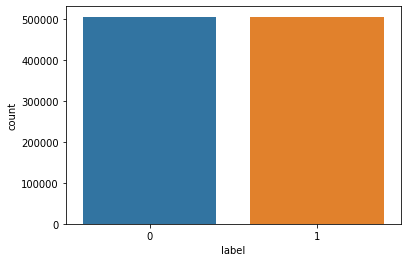

In [10]:
sns.countplot(x="label", data=train_df)

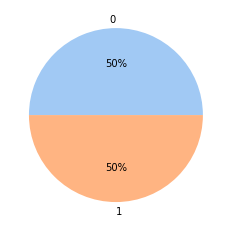

In [11]:
data = train_df["label"].value_counts()
labels = train_df["label"].unique()

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

#### Word Cloud

Now let us look at the frequently occuring words in the data by creating a word cloud on the 'comment' column

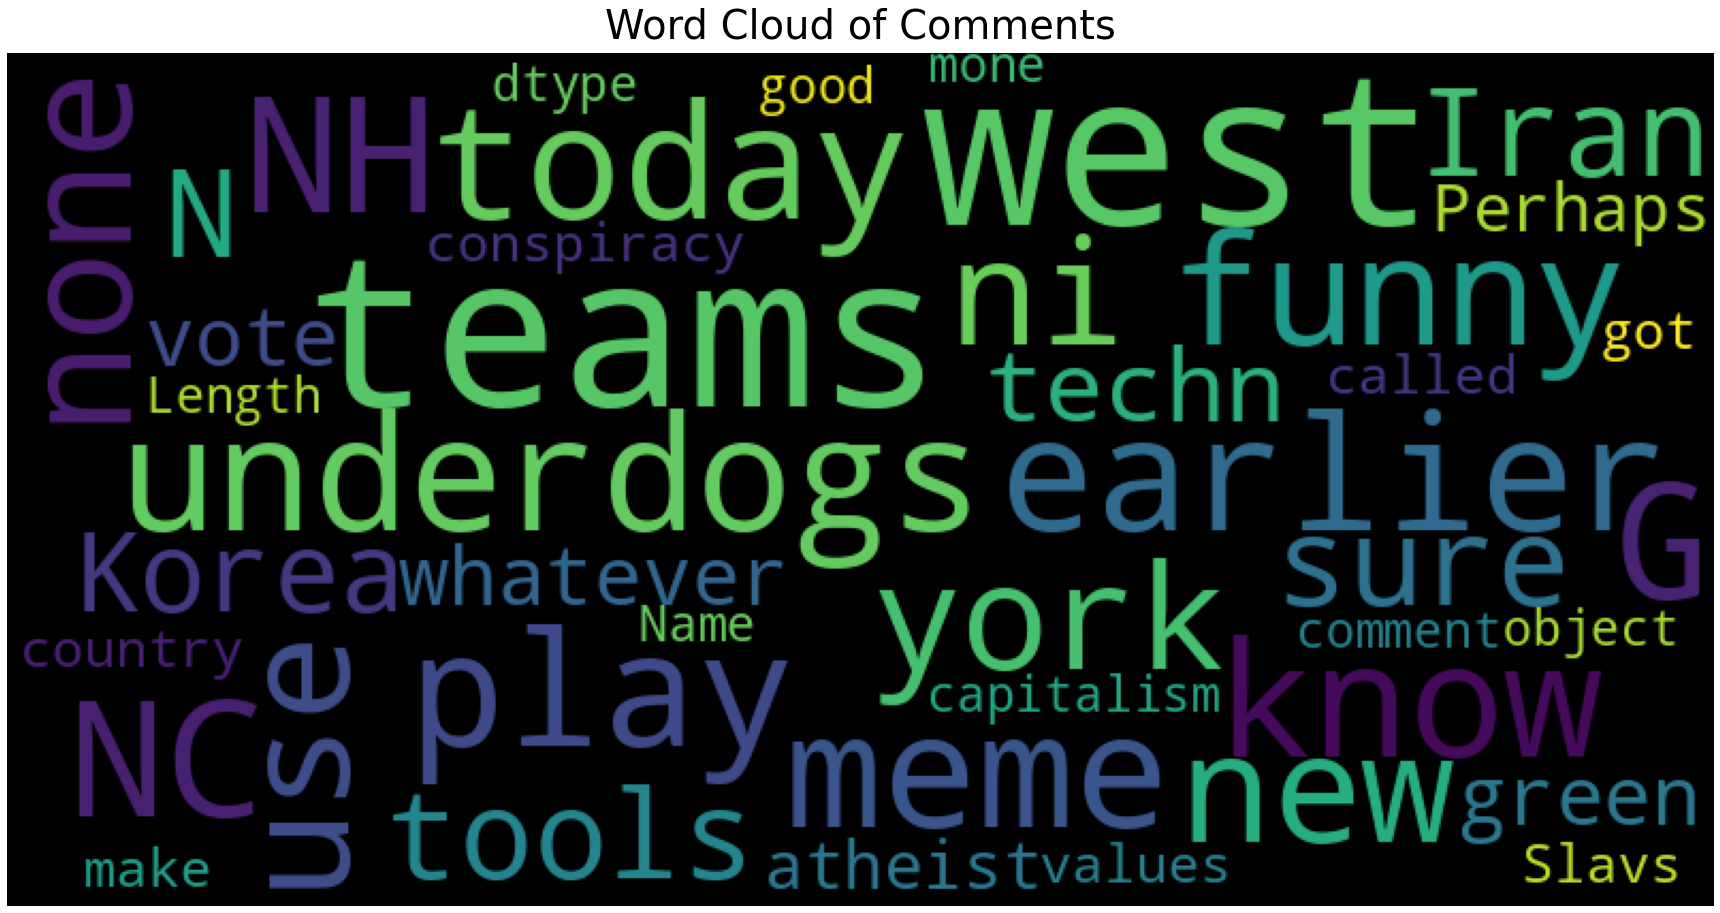

In [12]:
from wordcloud import WordCloud, STOPWORDS

# Thanks : https://www.kaggle.com/aashita/word-clouds-of-various-shapes ##
def plot_wordcloud(text, mask=None, max_words=200, max_font_size=100, figure_size=(24.0,16.0), 
                   title = None, title_size=40, image_color=False):
    stopwords = set(STOPWORDS)
    more_stopwords = {'one', 'br', 'Po', 'th', 'sayi', 'fo', 'Unknown'}
    stopwords = stopwords.union(more_stopwords)

    wordcloud = WordCloud(background_color='black',
                    stopwords = stopwords,
                    max_words = max_words,
                    max_font_size = max_font_size, 
                    random_state = 42,
                    width=800, 
                    height=400,
                    mask = mask)
    wordcloud.generate(str(text))
    
    plt.figure(figsize=figure_size)
    if image_color:
        image_colors = ImageColorGenerator(mask);
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear");
        plt.title(title, fontdict={'size': title_size,  
                                  'verticalalignment': 'bottom'})
    else:
        plt.imshow(wordcloud);
        plt.title(title, fontdict={'size': title_size, 'color': 'black', 
                                  'verticalalignment': 'bottom'})
    plt.axis('off');
    plt.tight_layout()  
    
plot_wordcloud(train_df["comment"], title="Word Cloud of Comments")

#### Word Frequency plot of sarcasm & no sarcasm comments

In [13]:
from collections import defaultdict
train1_df = train_df[train_df["label"]==1]
train0_df = train_df[train_df["label"]==0]

## custom function for ngram generation ##
def generate_ngrams(text, n_gram=1):
    token = [token for token in text.lower().split(" ") if token != "" if token not in STOPWORDS]
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    return [" ".join(ngram) for ngram in ngrams]

## custom function for horizontal bar chart ##
def horizontal_bar_chart(df, color):
    trace = go.Bar(
        y=df["word"].values[::-1],
        x=df["wordcount"].values[::-1],
        showlegend=False,
        orientation = 'h',
        marker=dict(
            color=color,
        ),
    )
    return trace

## Get the bar chart from sincere questions ##
freq_dict = defaultdict(int)
for sent in train0_df["comment"]:
    for word in generate_ngrams(sent):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace0 = horizontal_bar_chart(fd_sorted.head(50), 'blue')

## Get the bar chart from insincere questions ##
freq_dict = defaultdict(int)
for sent in train1_df["comment"]:
    for word in generate_ngrams(sent):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace1 = horizontal_bar_chart(fd_sorted.head(50), 'blue')

# Creating two subplots
fig = tools.make_subplots(rows=1, cols=2, vertical_spacing=0.04,
                          subplot_titles=["Frequent words of sarcasm comments", 
                                          "Frequent words of no sarcasm comments"])
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)
fig['layout'].update(height=1200, width=900, paper_bgcolor='rgb(233,233,233)', title="Word Count Plots")
py.iplot(fig, filename='word-plots')

/Users/arturburiev/Library/Caches/pypoetry/virtualenvs/mlcourse.ai-YmPKOXOi-py3.8/lib/python3.8/site-packages/plotly/tools.py:461: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



Now let us also create bigram frequency plots for both the classes separately to get more idea.

In [14]:
freq_dict = defaultdict(int)
for sent in train0_df["comment"]:
    for word in generate_ngrams(sent,2):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace0 = horizontal_bar_chart(fd_sorted.head(50), 'orange')


freq_dict = defaultdict(int)
for sent in train1_df["comment"]:
    for word in generate_ngrams(sent,2):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace1 = horizontal_bar_chart(fd_sorted.head(50), 'orange')

# Creating two subplots
fig = tools.make_subplots(rows=1, cols=2, vertical_spacing=0.04,horizontal_spacing=0.15,
                          subplot_titles=["Frequent bigrams of sarcasm comments", 
                                          "Frequent bigrams of no sarcasm comments"])
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)
fig['layout'].update(height=1200, width=900, paper_bgcolor='rgb(233,233,233)', title="Bigram Count Plots")
py.iplot(fig, filename='word-plots')

/Users/arturburiev/Library/Caches/pypoetry/virtualenvs/mlcourse.ai-YmPKOXOi-py3.8/lib/python3.8/site-packages/plotly/tools.py:461: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



Now let usl look at the trigram plots as well.

In [15]:
freq_dict = defaultdict(int)
for sent in train0_df["comment"]:
    for word in generate_ngrams(sent,3):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace0 = horizontal_bar_chart(fd_sorted.head(50), 'green')


freq_dict = defaultdict(int)
for sent in train1_df["comment"]:
    for word in generate_ngrams(sent,3):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace1 = horizontal_bar_chart(fd_sorted.head(50), 'green')

# Creating two subplots
fig = tools.make_subplots(rows=1, cols=2, vertical_spacing=0.04, horizontal_spacing=0.2,
                          subplot_titles=["Frequent trigrams of sincere comments", 
                                          "Frequent trigrams of insincere comments"])
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)
fig['layout'].update(height=1200, width=1200, paper_bgcolor='rgb(233,233,233)', title="Trigram Count Plots")
py.iplot(fig, filename='word-plots')

/Users/arturburiev/Library/Caches/pypoetry/virtualenvs/mlcourse.ai-YmPKOXOi-py3.8/lib/python3.8/site-packages/plotly/tools.py:461: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



#### Meta Features

Now let us create some meta features and then look at how they are distributed between the classes. The ones that we will create are:

- Number of words in the text
- Number of unique words in the text
- Number of characters in the text
- Number of stopwords
- Number of punctuations
- Number of upper case words
- Number of title case words
- Average length of the words

In [16]:
import string

In [17]:
## Number of words in the text ##
def calc_and_add_feat_num_words(df, text_col_name="comment"):
    df["num_words"] = df[text_col_name].apply(lambda x: len(str(x).split()))
    return df


## Number of unique words in the text ##
def calc_and_add_feat_num_unique_words(df, text_col_name="comment"):
    df["num_unique_words"] = df[text_col_name].apply(lambda x: len(set(str(x).split())))
    return df


## Number of characters in the text ##
def calc_and_add_feat_num_chars(df, text_col_name="comment"):
    df["num_chars"] = df[text_col_name].apply(lambda x: len(str(x)))
    return df


## Number of stopwords in the text ##
def calc_and_add_feat_num_stopwords(df, text_col_name="comment"):
    df["num_stopwords"] = df[text_col_name].apply(
        lambda x: len([w for w in str(x).lower().split() if w in STOPWORDS])
    )
    return df


## Number of punctuations in the text ##
def calc_and_add_feat_num_punctuations(df, text_col_name="comment"):
    df["num_punctuations"] = df[text_col_name].apply(
        lambda x: len([c for c in str(x) if c in string.punctuation])
    )
    return df


## Number of title case words in the text ##
def calc_and_add_feat_num_words_upper(df, text_col_name="comment"):
    df["num_words_upper"] = df[text_col_name].apply(
        lambda x: len([w for w in str(x).split() if w.isupper()])
    )
    return df


## Number of title case words in the text ##
def calc_and_add_feat_num_words_title(df, text_col_name="comment"):
    df["num_words_title"] = df[text_col_name].apply(
        lambda x: len([w for w in str(x).split() if w.istitle()])
    )
    return df


## Average length of the words in the text ##
def calc_and_add_feat_mean_word_len(df, text_col_name="comment"):
    df["mean_word_len"] = df[text_col_name].apply(
        lambda x: np.mean([len(w) for w in str(x).split()])
    )
    return df

In [18]:
train_df = calc_and_add_feat_num_words(train_df)
train_df = calc_and_add_feat_num_unique_words(train_df)
train_df = calc_and_add_feat_num_chars(train_df)
train_df = calc_and_add_feat_num_stopwords(train_df)
train_df = calc_and_add_feat_num_punctuations(train_df)
train_df = calc_and_add_feat_num_words_upper(train_df)
train_df = calc_and_add_feat_num_words_title(train_df)
train_df = calc_and_add_feat_mean_word_len(train_df)

/var/folders/br/1mrnb_9914qdgv0gnfkfx15r0000gn/T/ipykernel_30124/3846578241.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/br/1mrnb_9914qdgv0gnfkfx15r0000gn/T/ipykernel_30124/3846578241.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/br/1mrnb_9914qdgv0gnfkfx15r0000gn/T/ipykernel_30124/3846578241.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



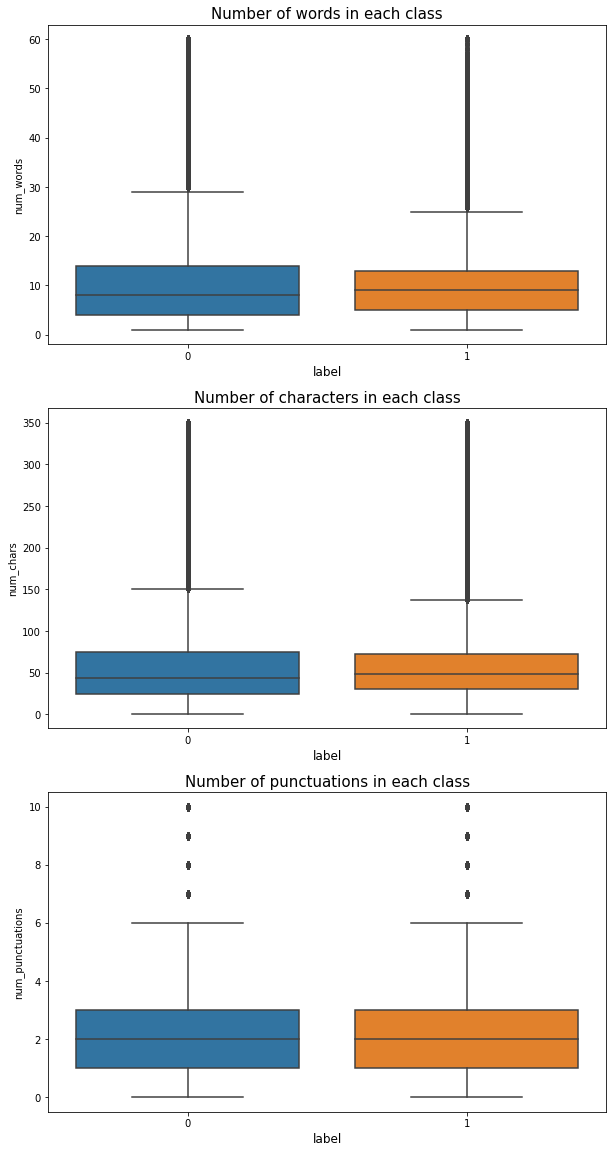

In [19]:
## Truncate some extreme values for better visuals ##
train_df['num_words'].loc[train_df['num_words']>60] = 60 #truncation for better visuals
train_df['num_punctuations'].loc[train_df['num_punctuations']>10] = 10 #truncation for better visuals
train_df['num_chars'].loc[train_df['num_chars']>350] = 350 #truncation for better visuals

f, axes = plt.subplots(3, 1, figsize=(10,20))
sns.boxplot(x='label', y='num_words', data=train_df, ax=axes[0])
axes[0].set_xlabel('label', fontsize=12)
axes[0].set_title("Number of words in each class", fontsize=15)

sns.boxplot(x='label', y='num_chars', data=train_df, ax=axes[1])
axes[1].set_xlabel('label', fontsize=12)
axes[1].set_title("Number of characters in each class", fontsize=15)

sns.boxplot(x='label', y='num_punctuations', data=train_df, ax=axes[2])
axes[2].set_xlabel('label', fontsize=12)
#plt.ylabel('Number of punctuations in text', fontsize=12)
axes[2].set_title("Number of punctuations in each class", fontsize=15)
plt.show()

### 2. Build a Tf-Idf + logistic regression pipeline to predict sarcasm (`label`) based on the text of a comment on Reddit (`comment`).

In [20]:
X_train, X_test, y_train, y_test = train_test_split(
    train_df.drop("label", axis=1), train_df["label"], test_size=0.33, random_state=17
)

In [21]:
pipe = Pipeline(
    [
        ("tfidf_vectorizer", TfidfVectorizer(ngram_range=(1, 2))),
        ("logreg", LogisticRegression(solver="sag")),
    ]
)

In [22]:
pipe.fit(X_train["comment"], y_train)

Pipeline(steps=[('tfidf_vectorizer', TfidfVectorizer(ngram_range=(1, 2))),
                ('logreg', LogisticRegression(solver='sag'))])

In [23]:
pipe.score(X_test["comment"], y_test)

0.7229970379786302

### 3. Plot the words/bigrams which a most predictive of sarcasm (you can use [eli5](https://github.com/TeamHG-Memex/eli5) for that).

In [24]:
import eli5

/Users/arturburiev/Library/Caches/pypoetry/virtualenvs/mlcourse.ai-YmPKOXOi-py3.8/lib/python3.8/site-packages/xgboost/compat.py:36: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



In [25]:
eli5.show_weights(pipe["logreg"], vec=pipe["tfidf_vectorizer"])

/Users/arturburiev/Library/Caches/pypoetry/virtualenvs/mlcourse.ai-YmPKOXOi-py3.8/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



### 4. (optionally) add subreddits as new features to improve model performance. Apply here the Bag of Words approach, i.e. treat each subreddit as a new feature.

In [133]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [134]:
columns = ["comment", "subreddit"]

In [135]:
prep = ColumnTransformer(
    [
        ("tfidf_vec", TfidfVectorizer(ngram_range=(1, 2)), "comment"),
        ("onehot_enc", OneHotEncoder(handle_unknown="ignore"), ["subreddit"]),
    ],
    remainder="passthrough",
)

In [136]:
pipe = Pipeline(
    [
        ("prep", prep),
        ("logreg", LogisticRegression(solver="sag")),
    ]
)

In [137]:
pipe.fit(X_train[columns], y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('tfidf_vec',
                                                  TfidfVectorizer(ngram_range=(1,
                                                                               2)),
                                                  'comment'),
                                                 ('onehot_enc',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['subreddit'])])),
                ('logreg', LogisticRegression(solver='sag'))])

In [ ]:
accuracy_score(y_test, pipe.predict(X_test[columns]))